# Домашнее задание 2 - предобработка признаков, pandas


### О задании

Практическое задание 2 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Кроме того, некоторые из заданий являются опциональными (необязательными), однако за их выполнение можно получить дополнительные баллы, которые позднее будут учитываться при проставлении оценок автоматом по курсу.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [41]:
import numpy as np

**1. (0.2 балла)** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [2]:
def max_element(arr):
    arr = np.array(arr)
    index = (arr == 0)[:-1]
    arr = arr[1:]
    if len(arr[index]) == 0:
        return None
    else:
        return max(arr[index])

In [3]:
x = [6, 2, 3, 0, 5, 7, 0]
max_element(x)

5

**2. (0.2 балла)** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [4]:
def nearest_value(X, v):
    X = np.array(X)
    M = abs(X - v)  ## Матрица расстояний между элементами матрицы X и числом v
    index = np.where(M == np.min(M))
    return int(X[index])

In [5]:
X = [[1, 2, 3], [4, 5, 6]]
Y = np.arange(0,10).reshape((2, 5))
nearest_value(Y, 3.6)

4

In [6]:
nearest_value(X, 1.7)

2

**3. (0.2 балла)** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

In [9]:
def scale(X):
    Y = X - X.mean(axis=0)
    Y /= (X.std(axis=0) + 0.00001)  # std >= 0, -> std + 0.00001 > 0
    return Y

In [10]:
np.random.seed(6)
X = np.random.randint(0, 6, size=(3,4))
print(X)
print()
print(scale(X))

[[2 1 3 4]
 [2 5 2 0]
 [1 1 3 5]]

[[ 0.70709178 -0.70710303  0.70709178  0.46290791]
 [ 0.70709178  1.41420606 -1.41418356 -1.38872372]
 [-1.41418356 -0.70710303  0.70709178  0.92581581]]


**4. (0.2 балла)** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

Для тестирования сгенерируйте матрицу с элементами из нормального распределения $\mathcal{N}$(10,1)

In [29]:
def get_stats(X):
    det = np.linalg.det(X)
    trace = np.trace(X)  # След квадратной матрицы - сумма элементов главной диагонали
    min_X = np.min(X)
    max_X = np.max(X)
    # Норма Фробениуса (Евклидова норма) — квадратный корень сумм квадратов модулей элементов матрицы
    Frobenius = np.linalg.norm(X, 'fro')
    eigenvalues, garbage = np.linalg.eig(X)
    inverse = np.linalg.inv(X)
    
    print("det = ", det)
    print("trace = ", trace)
    print("min = ", min_X)
    print("max = ", max_X)
    print("Frobenius = ", Frobenius)
    print()
    print("eigenvalues: \n", eigenvalues)
    print()
    print("inverse: \n", inverse)

In [31]:
X = np.random.normal(10, 1, size=(3, 3))
print(X)
print()
get_stats(X)

[[10.13259459 10.75920229  9.12495874]
 [11.57537279 10.34021844 10.08931325]
 [ 8.59635291 10.35737817 10.37281326]]

det =  -47.844934062258524
trace =  30.84562628996074
min =  8.596352912901965
max =  11.57537279083188
Frobenius =  30.547769383623326

eigenvalues: 
 [30.47742656  1.45048882 -1.08228909]

inverse: 
 [[-0.05765129  0.35724885 -0.29676905]
 [ 0.69679024 -0.55726163 -0.07093496]
 [-0.64797553  0.26036642  0.41317929]]


**5. (0.2 балла)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

In [33]:
np.random.seed(6)
find_max = np.empty(100)

for n in range(100):
    A = np.random.normal(size=(10,10))
    B = np.random.normal(size=(10,10))
    A = A.dot(B)
    find_max[n] = np.max(A)
    
print(np.average(find_max), np.quantile(find_max, 0.95))

8.184508709153432 11.50049336469497


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [42]:
import pandas as pd
%matplotlib inline

In [43]:
df = pd.read_csv('2008.csv')
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**6. (0.3 балла)** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [45]:
df.groupby('CancellationCode').count()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
CancellationCode,,,,,,,,,,,,,,,,,,,,,
A,563,563,563,563,5,563,0,563,563,563,...,563,0,0,563,563,0,0,0,0,0
B,549,549,549,549,7,549,0,549,549,549,...,549,0,5,549,549,0,0,0,0,0
C,299,299,299,299,0,299,0,299,299,299,...,299,0,0,299,299,0,0,0,0,0


***`Самая частая причина отмены рейса: A - carrier`***

**7. (0.3 балла)** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [53]:
df.describe(include='all')['Distance']

count     70000.000000
unique             NaN
top                NaN
freq               NaN
mean        724.508257
std         565.485009
min          31.000000
25%         324.000000
50%         575.000000
75%         950.000000
max        4962.000000
Name: Distance, dtype: float64

***`Среднее расстояние - 724.508257 миль`***

***`Минимальное расстояние - 31 миля`***

***`Максимальное расстояние - 4962 миль`***

**8. (0.3 балла)** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [62]:
df[df['Distance'] == 31.0][['DayofMonth', 'Month', 'Origin', 'Dest', 'TailNum']]

,DayofMonth,Month,Origin,Dest,TailNum
1116,30,12,WRG,PSG,N795AS
6958,26,12,WRG,PSG,N795AS
17349,18,8,PSG,WRG,N768AS
27534,11,3,PSG,WRG,N764AS
46082,9,8,WRG,PSG,N708AS
48112,28,2,PSG,WRG,N762AS


https://www.youtube.com/watch?v=27XHp4pkScE

***`Перелёты между Врангелем и Питесбергом.`***

In [64]:
df[(df['TailNum'] == 'N795AS') | (df['TailNum'] == 'N768AS') | (df['TailNum'] == 'N764AS') | (df['TailNum'] == 'N708AS') | (df['TailNum'] == 'N762AS')]['Distance']

84        160
994      1449
1116       31
1872      183
1951      503
         ... 
67275     539
67631     160
67994     199
68514     549
69107     671
Name: Distance, Length: 102, dtype: int64

In [92]:
print("mean = ", df[df["FlightNum"] == 65]["Distance"].mean())
df[df["FlightNum"] == 65]["Distance"]

mean =  783.5128205128206


1116       31
1517      680
6326       82
6958       31
10113     571
14646    2454
15173    1005
26025     581
26109     571
26824    1747
32173    1747
32956    2454
33211    1005
37350      82
39438     571
43132     123
45031      82
46082      31
47168     581
47716     281
49369     682
50184     372
50888      82
50910     372
51841    1747
52459     581
52618     680
52779    1747
54909     581
57730    1747
57822    1747
59015    1005
64203      82
65662     123
66042     372
66529      82
68264     386
68338    2454
69305    1005
Name: Distance, dtype: int64

In [93]:
print("mean = ", df[df["FlightNum"] == 64]["Distance"].mean())
df[df["FlightNum"] == 64]["Distance"]

mean =  748.1282051282051


501       533
1389      680
2619     2381
3869       82
4025     1005
4466      123
6778      359
7891     2381
7977     1747
8448      123
9615      533
10833     372
12352    1747
12980      82
13155    1747
17349      31
21304    1005
24750     680
25671     533
26323    1005
27534      31
29801     123
30053      82
31375    1005
31629     883
32242      82
33769    1747
41044    1747
43353     571
44649     571
44810      82
48020    1005
48112      31
55053     123
58530     571
61164     680
63028    1747
64319     414
67172     533
Name: Distance, dtype: int64

**9. (0.3 балла)** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [69]:
df.groupby('Origin')['Year'].count().sort_values(ascending=False)

Origin
ATL    4134
ORD    3550
DFW    2793
DEN    2383
LAX    2082
       ... 
LMT       1
LWB       1
PLN       1
RHI       1
INL       1
Name: Year, Length: 297, dtype: int64

***`Международный аэропорт Хартсфилд-Джексон Атланта (ATL) - 4134 вылета`***

**10. (0.3 балла)** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [74]:
df['AirTime'].describe

<bound method NDFrame.describe of 0         46.0
1        108.0
2        125.0
3         79.0
4        136.0
         ...  
69995     86.0
69996     30.0
69997     63.0
69998    192.0
69999     46.0
Name: AirTime, Length: 70000, dtype: float64>

In [80]:
df.groupby('Origin')['AirTime'].mean().sort_values(ascending=False)

Origin
SJU    205.200000
BQN    193.954545
PSE    191.875000
STT    185.029412
ANC    165.415094
          ...    
PSG     20.250000
OXR     19.666667
WRG     18.000000
GST     13.000000
DLG           NaN
Name: AirTime, Length: 297, dtype: float64

***`Международный аэропорт Луис Муньос Марин, среднее время полёта - 205.2 часа`***

**11. (0.5 балла)** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

***Не понял, как использовать `filter` $-$ обойдусь без него***

In [95]:
delayed = df.groupby('Origin')
flights = delayed['Year'].count()
flights = flights.loc[flights >= 1000] 
delays = df[df['DepDelay'] > 0].groupby('Origin')['DepDelay'].sum()

fraction = delays / flights
fraction.sort_values(ascending=False)

Origin
EWR    21.035277
ORD    18.847042
SFO    15.078125
JFK    14.862614
PHL    14.037975
         ...    
VPS          NaN
WRG          NaN
XNA          NaN
YAK          NaN
YUM          NaN
Length: 277, dtype: float64

***`Международный аэропорт Ньюарк Либерти EWR - 21.035277% задержанных рейсов.`***

In [83]:
df.groupby('Origin')['']

Year        70000
DepDelay    68601
dtype: int64

## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12. (0.5 балла)** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [112]:
df = pd.read_csv('2008.csv')

In [113]:
df.isna().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

In [114]:
df.isna().sum().sum()

355215

***`Пропуски присутствуют, причём, в каждой строке таблицы`***

In [115]:
np.count_nonzero(df.isna().sum(axis=1))

70000

***`16 признаков имеют пропущенные значения`***

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

***`Значения целевой переменной пропущены для отменённых рейсов.`***

In [116]:
df[df['DepDelay'].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [117]:
df = df[(df["DepDelay"] > 0) | (df["DepDelay"] < 0)]
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


In [118]:
labels = np.array(df["DepDelay"])
df = df.drop(columns="DepDelay")
labels

array([16., 16., -2., ..., 24.,  6., -1.])

**13. (0.5 балла)** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [119]:
df['DepTime_Hour'] = df['DepTime'].apply(lambda x: x // 100)
df['DepTime_Minute'] = df['DepTime'].apply(lambda x: x % 100)
df['ArrTime_Hour'] = df['ArrTime'].apply(lambda x: x // 100)
df['ArrTime_Minute'] = df['ArrTime'].apply(lambda x: x % 100)
df['CRSArrTime_Hour'] = df['CRSArrTime'].apply(lambda x: x // 100)
df['CRSArrTime_Minute'] = df['CRSArrTime'].apply(lambda x: x % 100)
df['CRSDepTime_Hour'] = df['CRSDepTime'].apply(lambda x: x // 100)
df['CRSDepTime_Minute'] = df['CRSDepTime'].apply(lambda x: x % 100)

to_drop = ['DepTime', 'ArrTime', 'CRSArrTime', 'CRSDepTime']
df.drop(to_drop, axis='columns', inplace=True)

In [120]:
df

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,23.0,8.0,23,0,20,55
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,17.0,30.0,17,28,14,10
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,15.0,1.0,15,20,11,45
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,13.0,23.0,13,35,11,44
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,12.0,43.0,13,0,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,11.0,10.0,11,18,9,25
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,21.0,37.0,21,49,18,40
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,13.0,36.0,13,14,11,25
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,22.0,0.0,21,39,19,0


**14. (0.5 балла)** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [121]:
local_df = df.copy()
local_df["DepDelay"] = labels
corr = local_df.corr(numeric_only=True)[["DepDelay"]]
corr[corr["DepDelay"] > 0.2]

,DepDelay
ArrDelay,0.933526
CarrierDelay,0.532696
WeatherDelay,0.238872
LateAircraftDelay,0.553806
DepTime_Hour,0.203125
DepDelay,1.000000


***`Вообще говоря, можно убрать все признаки, в которых содержится слово Delay`***

In [122]:
to_drop = ['SecurityDelay', 'LateAircraftDelay', 'WeatherDelay', 'NASDelay', 'CarrierDelay', 'ArrDelay', 'TailNum', 'Year']
df.drop(to_drop, axis='columns', inplace=True)

In [123]:
df

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,CancellationCode,Diverted,DepTime_Hour,DepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,NaN,0,21.0,11.0,23.0,8.0,23,0,20,55
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,NaN,0,14.0,26.0,17.0,30.0,17,28,14,10
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,NaN,0,11.0,43.0,15.0,1.0,15,20,11,45
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,NaN,0,11.0,41.0,13.0,23.0,13,35,11,44
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,NaN,0,8.0,15.0,12.0,43.0,13,0,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,CVG,BDL,...,NaN,0,9.0,20.0,11.0,10.0,11,18,9,25
69995,5,12,1,DL,794,128.0,129.0,86.0,ORD,ATL,...,NaN,0,18.0,29.0,21.0,37.0,21,49,18,40
69996,5,11,7,OO,6159,47.0,49.0,30.0,ORD,GRR,...,NaN,0,11.0,49.0,13.0,36.0,13,14,11,25
69998,2,18,1,NW,641,234.0,219.0,192.0,RSW,MSP,...,NaN,0,19.0,6.0,22.0,0.0,21,39,19,0


**15. (1 балл)** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

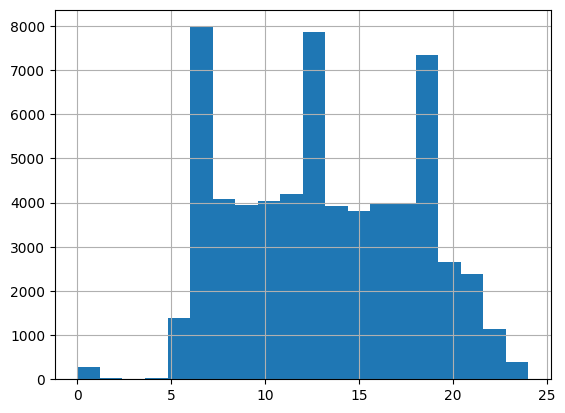

In [128]:
df['DepTime_Hour'].hist(bins=20)

<Axes: >

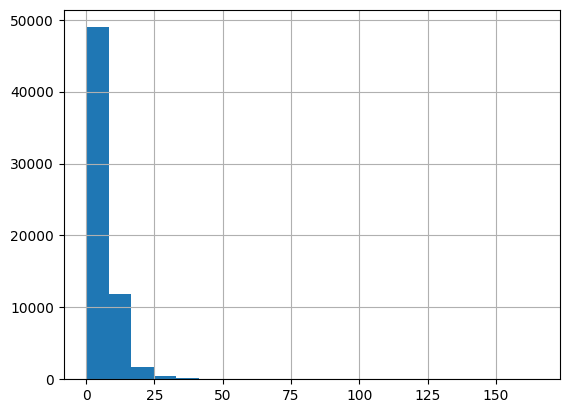

In [126]:
df['TaxiIn'].hist(bins=20)

<Axes: >

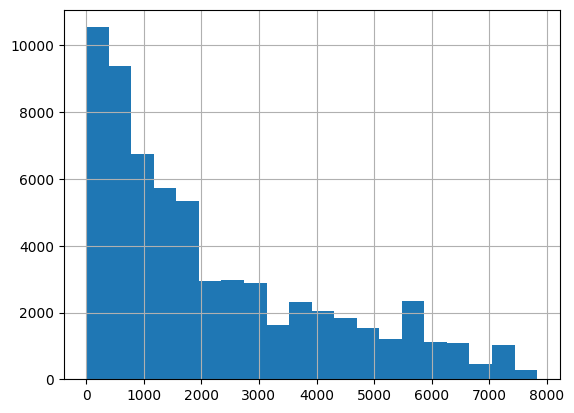

In [127]:
df['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

***`Проблема заключается в том, что данные распределены неравномерно. Масштабирование позволит сделать разницу не такой большой, что поможет нам выделить существенные признаки, на основе которых можно строить точные предсказания.`***

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [133]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 9.2/9.2 MB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 302.2/302.2 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [134]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    num = data.select_dtypes('number')
    ind = num.index
    cols = num.columns
    cat = data.select_dtypes('object')
    num.fillna(0, inplace=True)
    cat.fillna('nan', inplace=True)
    
    scaler = StandardScaler()
    num = pd.DataFrame(scaler.fit_transform(num), index=ind, columns=cols)
    
    cat = pd.get_dummies(cat)
    
    return pd.concat([num, cat], axis=1)

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [135]:
df = transform_data(df)

In [136]:
df

,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM,CancellationCode_A,CancellationCode_B,CancellationCode_nan
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,False,False,False,False,False,False,False,False,False,True
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,False,False,False,False,False,False,False,False,False,True
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,False,False,False,False,False,False,False,False,False,True
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,False,False,False,False,False,False,False,False,False,True
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,False,False,False,False,False,False,False,False,False,True
69995,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,False,False,False,False,False,False,False,False,False,True
69996,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,False,False,False,False,False,False,False,False,False,True
69998,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,False,False,False,False,False,False,False,False,False,True


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, random_state=25)
y_test

array([ 3., -2., -1., ...,  9.,  5., 11.])

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17. (0.5 балла)** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

batch = 1000

data_train, labels_train = X_train[:batch], y_train[:batch]

model.fit(data_train, labels_train)

pred_train = model.predict(data_train)
pred_test = model.predict(X_test)

print("MSE Train =", mean_squared_error(labels_train, pred_train))
print("R2 Train =", model.score(data_train, labels_train), end="\n\n")

print("MSE Test =", mean_squared_error(y_test, pred_test))
print("R2 Test =", model.score(X_test, y_test))

MSE Train = 658.9361748046875
R2 Train = 0.3735933719524719

MSE Test = 1.9608897547069142e+30
R2 Test = -1.5341885335273708e+27


Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [141]:
import sklearn.linear_model as lm
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [142]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(lm.Lasso(), [{"alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(X_train, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

KeyboardInterrupt: 

__18. (1 балл) __ Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [ ]:
# Your code here
# ...

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
# Your code here
# ...

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

In [ ]:
# Your code here
# ...

__19. (0.5 балла)__ Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?